[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lisuex/Machine-Learning2025/blob/main/Lab09.ipynb)

**Train the model**

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Set device and random seeds
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)
np.random.seed(42)

# 1. Data Loading and Preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=2048, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False)

# 2. Define MLP Model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(28*28, 1024)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(1024, 2048)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(2048, 256)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.05)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu1(self.linear1(x))
        x = self.relu2(self.linear2(x))
        x = self.relu3(self.linear3(x))
        x = self.linear4(x)
        x = self.dropout(x)
        return x

# 3. Train the Model
def train_model():
    model = MLP().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    print("Training MNIST classifier...")
    for epoch in range(8):
        model.train()
        running_loss = 0.0
        for inputs, labels in tqdm(trainloader, desc=f"Epoch {epoch+1}"):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

    # Test accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Test Accuracy: {100 * correct / total:.2f}%")
    return model

# Train model and freeze parameters
model = train_model()
model.eval()
for param in model.parameters():
    param.requires_grad = False


Training MNIST classifier...


Epoch 1: 100%|██████████| 30/30 [00:36<00:00,  1.21s/it]


Epoch 1, Loss: 0.6782


Epoch 2: 100%|██████████| 30/30 [00:31<00:00,  1.05s/it]


Epoch 2, Loss: 0.1970


Epoch 3: 100%|██████████| 30/30 [00:33<00:00,  1.13s/it]


Epoch 3, Loss: 0.1281


Epoch 4: 100%|██████████| 30/30 [00:33<00:00,  1.10s/it]


Epoch 4, Loss: 0.0912


Epoch 5: 100%|██████████| 30/30 [00:32<00:00,  1.07s/it]


Epoch 5, Loss: 0.0690


Epoch 6: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]


Epoch 6, Loss: 0.0566


Epoch 7: 100%|██████████| 30/30 [00:33<00:00,  1.10s/it]


Epoch 7, Loss: 0.0442


Epoch 8: 100%|██████████| 30/30 [00:32<00:00,  1.07s/it]


Epoch 8, Loss: 0.0400
Test Accuracy: 97.90%


**Use trained model and change the input digits based on losses**


=== Task 1: Generating digits 0-9 from noise ===
Iteration 0: Loss = 5.6180, Avg Confidence = 0.2246
Iteration 50: Loss = 1.6619, Avg Confidence = 0.4206
Iteration 100: Loss = 0.5087, Avg Confidence = 0.7028
Iteration 150: Loss = 0.2038, Avg Confidence = 0.8353
Iteration 200: Loss = 0.1138, Avg Confidence = 0.8969
Iteration 250: Loss = 0.0780, Avg Confidence = 0.9265
Iteration 300: Loss = 0.0594, Avg Confidence = 0.9431
Iteration 350: Loss = 0.0483, Avg Confidence = 0.9533
Iteration 400: Loss = 0.0409, Avg Confidence = 0.9602
Iteration 450: Loss = 0.0355, Avg Confidence = 0.9653
Iteration 499: Loss = 0.0315, Avg Confidence = 0.9691


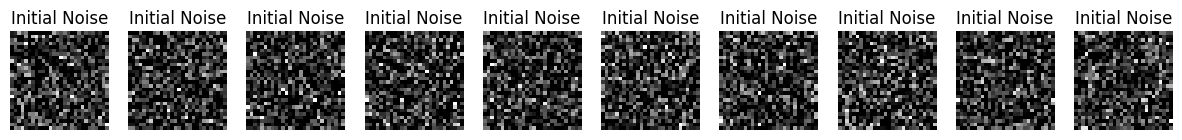

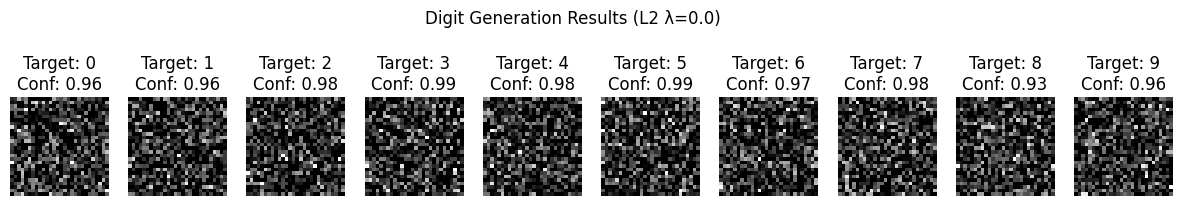

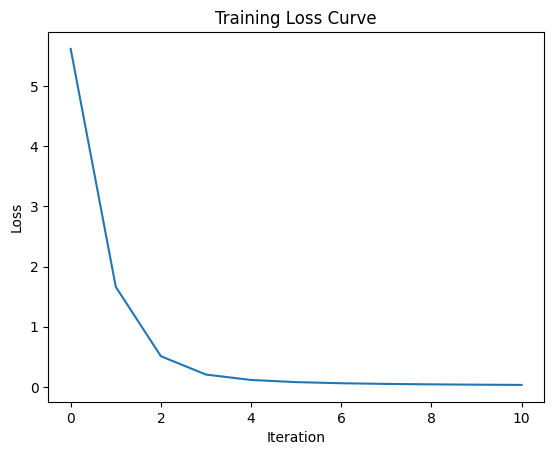


=== Task 2: Generating hybrid digits ===
Iteration 0: Loss = 7.4329
Probabilities: {tensor(3): 0.002378421137109399, tensor(8): 0.00014707958325743675}
Iteration 50: Loss = 0.7564
Probabilities: {tensor(3): 0.4688856899738312, tensor(8): 0.46979743242263794}
Iteration 100: Loss = 0.7279
Probabilities: {tensor(3): 0.48222216963768005, tensor(8): 0.4835881292819977}
Iteration 150: Loss = 0.7181
Probabilities: {tensor(3): 0.4872235655784607, tensor(8): 0.48815613985061646}
Iteration 200: Loss = 0.7127
Probabilities: {tensor(3): 0.48991501331329346, tensor(8): 0.4907047748565674}
Iteration 250: Loss = 0.7095
Probabilities: {tensor(3): 0.4915241003036499, tensor(8): 0.492275208234787}
Iteration 300: Loss = 0.7072
Probabilities: {tensor(3): 0.4926154911518097, tensor(8): 0.4934060275554657}
Iteration 350: Loss = 0.7056
Probabilities: {tensor(3): 0.49358707666397095, tensor(8): 0.4940517842769623}
Iteration 400: Loss = 0.7043
Probabilities: {tensor(3): 0.4942760467529297, tensor(8): 0.494623

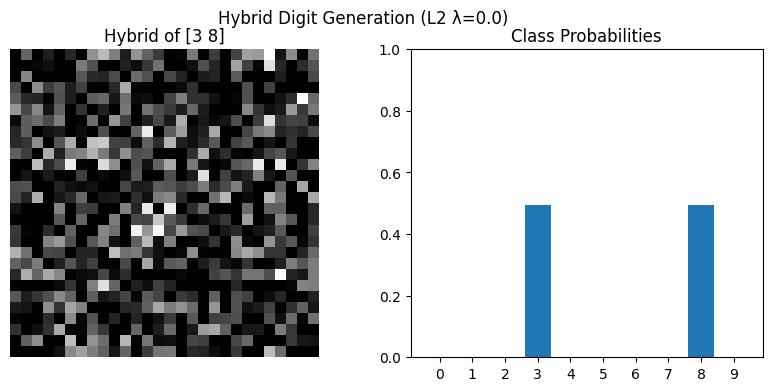

Iteration 0: Loss = 12.7266
Probabilities: {tensor(0): 1.423216986040643e-06, tensor(6): 6.2024578255659435e-06}
Iteration 50: Loss = 0.9153
Probabilities: {tensor(0): 0.3537837266921997, tensor(6): 0.4531571567058563}
Iteration 100: Loss = 0.7416
Probabilities: {tensor(0): 0.46910831332206726, tensor(6): 0.4836598038673401}
Iteration 150: Loss = 0.7213
Probabilities: {tensor(0): 0.4824431538581848, tensor(6): 0.4897788465023041}
Iteration 200: Loss = 0.7133
Probabilities: {tensor(0): 0.48745468258857727, tensor(6): 0.49263301491737366}
Iteration 250: Loss = 0.7089
Probabilities: {tensor(0): 0.4901014268398285, tensor(6): 0.4943007528781891}
Iteration 300: Loss = 0.7062
Probabilities: {tensor(0): 0.4918123781681061, tensor(6): 0.4952694773674011}
Iteration 350: Loss = 0.7043
Probabilities: {tensor(0): 0.4929022789001465, tensor(6): 0.4959825277328491}
Iteration 400: Loss = 0.7030
Probabilities: {tensor(0): 0.49379149079322815, tensor(6): 0.4964447021484375}
Iteration 450: Loss = 0.7019

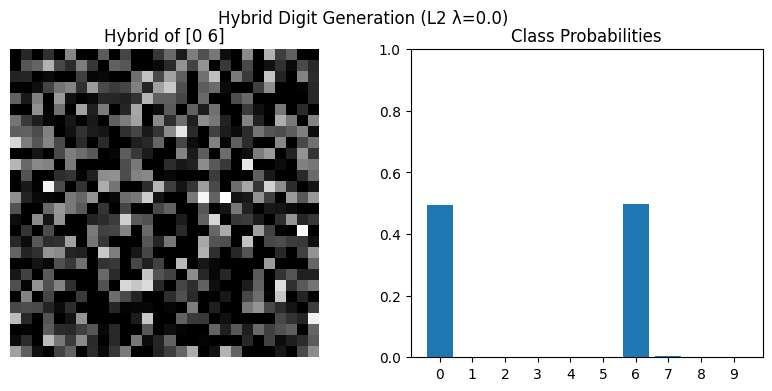


=== Task 3: Testing L2 regularization ===

Generating with L2 λ=0.001
Iteration 0: Loss = 5.2699, Avg Confidence = 0.0880
Iteration 50: Loss = 1.6502, Avg Confidence = 0.3868
Iteration 100: Loss = 0.4632, Avg Confidence = 0.6792
Iteration 150: Loss = 0.2277, Avg Confidence = 0.8162
Iteration 200: Loss = 0.1450, Avg Confidence = 0.8750
Iteration 250: Loss = 0.1029, Avg Confidence = 0.9078
Iteration 299: Loss = 0.0796, Avg Confidence = 0.9271


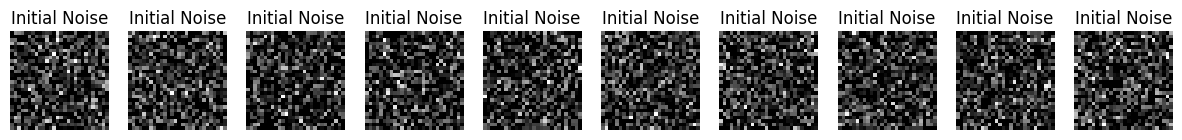

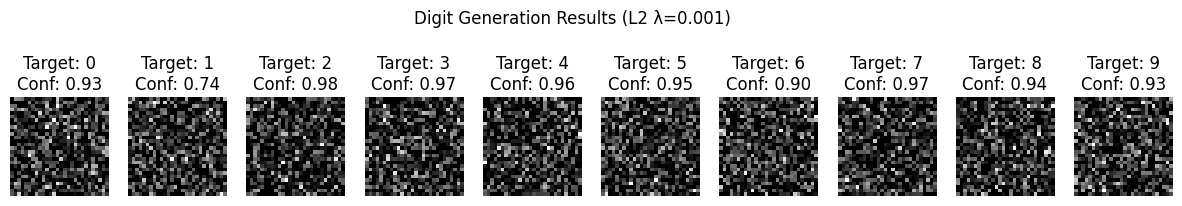

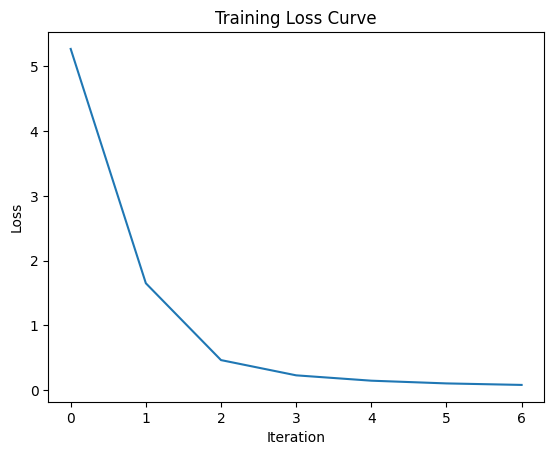


Generating with L2 λ=0.01
Iteration 0: Loss = 5.1915, Avg Confidence = 0.0832
Iteration 50: Loss = 1.9116, Avg Confidence = 0.4028
Iteration 100: Loss = 0.7291, Avg Confidence = 0.6249
Iteration 150: Loss = 0.3287, Avg Confidence = 0.7820
Iteration 200: Loss = 0.1863, Avg Confidence = 0.8579
Iteration 250: Loss = 0.1212, Avg Confidence = 0.9013
Iteration 299: Loss = 0.0897, Avg Confidence = 0.9259


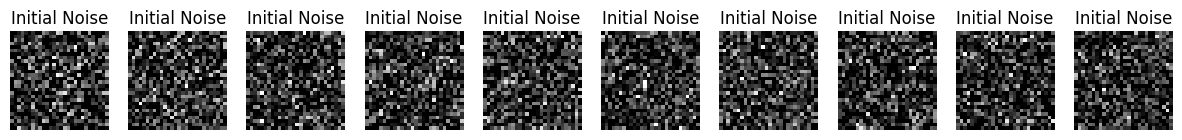

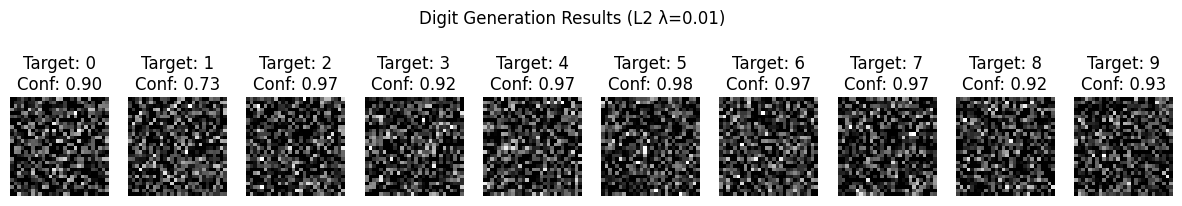

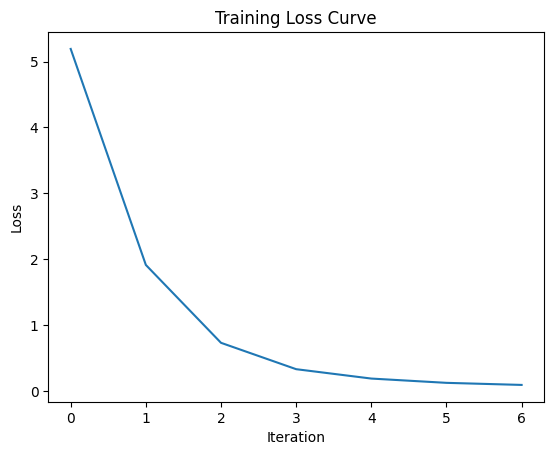


Generating with L2 λ=0.1
Iteration 0: Loss = 5.8082, Avg Confidence = 0.0410
Iteration 50: Loss = 2.2204, Avg Confidence = 0.3762
Iteration 100: Loss = 0.8697, Avg Confidence = 0.6168
Iteration 150: Loss = 0.3661, Avg Confidence = 0.7948
Iteration 200: Loss = 0.2401, Avg Confidence = 0.8744
Iteration 250: Loss = 0.1942, Avg Confidence = 0.9114
Iteration 299: Loss = 0.1710, Avg Confidence = 0.9316


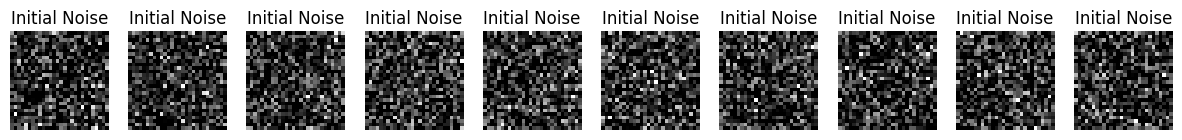

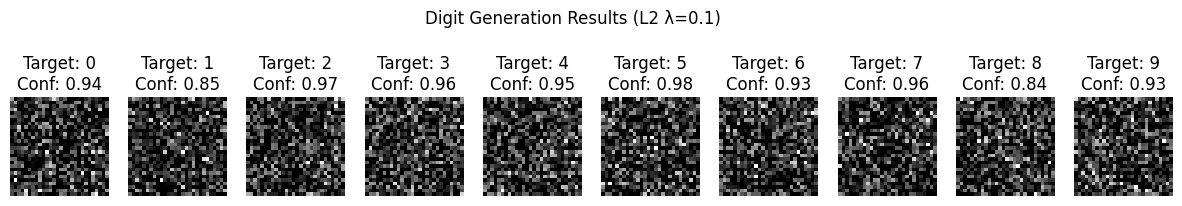

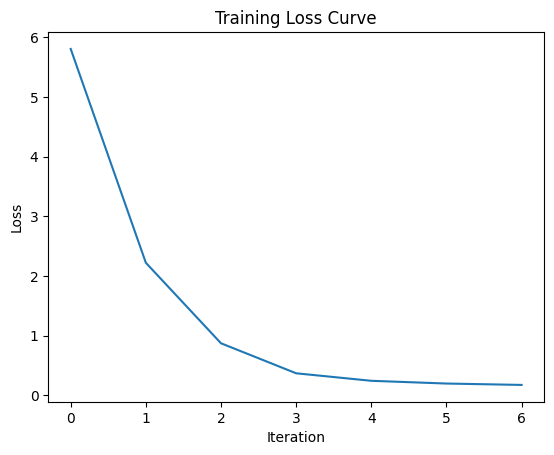


Generating with L2 λ=0.5
Iteration 0: Loss = 6.0939, Avg Confidence = 0.1045
Iteration 50: Loss = 2.5197, Avg Confidence = 0.3741
Iteration 100: Loss = 1.1947, Avg Confidence = 0.6315
Iteration 150: Loss = 0.7592, Avg Confidence = 0.7985
Iteration 200: Loss = 0.6243, Avg Confidence = 0.8805
Iteration 250: Loss = 0.5738, Avg Confidence = 0.9197
Iteration 299: Loss = 0.5499, Avg Confidence = 0.9399


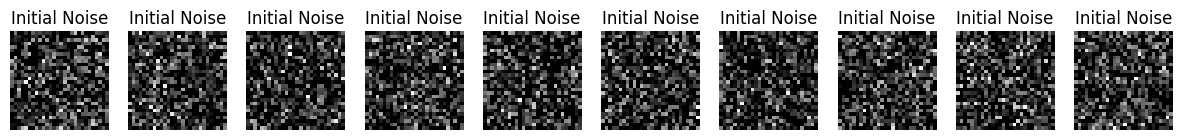

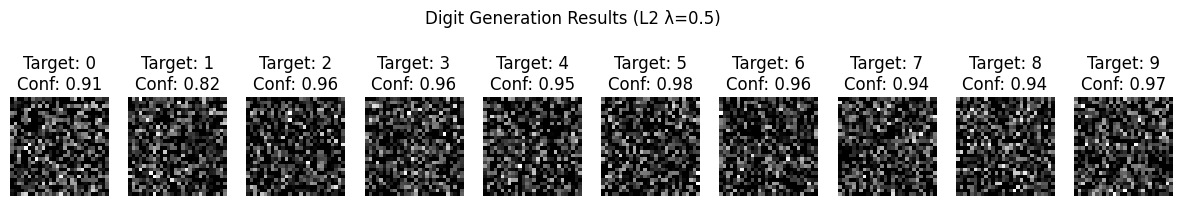

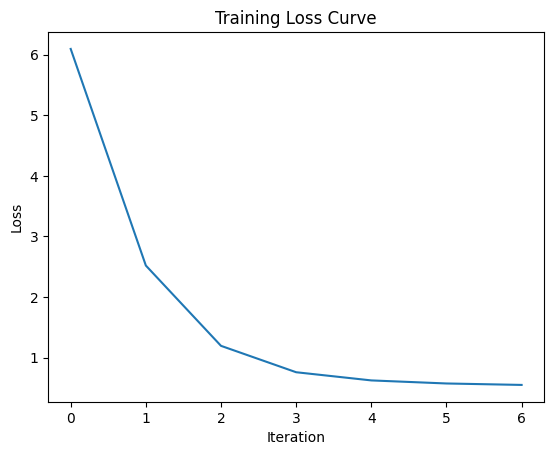


Generating with L2 λ=1.0
Iteration 0: Loss = 6.6156, Avg Confidence = 0.1477
Iteration 50: Loss = 3.9511, Avg Confidence = 0.3512
Iteration 100: Loss = 2.4279, Avg Confidence = 0.5614
Iteration 150: Loss = 1.6853, Avg Confidence = 0.6843
Iteration 200: Loss = 1.2767, Avg Confidence = 0.7988
Iteration 250: Loss = 1.1226, Avg Confidence = 0.8749
Iteration 299: Loss = 1.0663, Avg Confidence = 0.9147


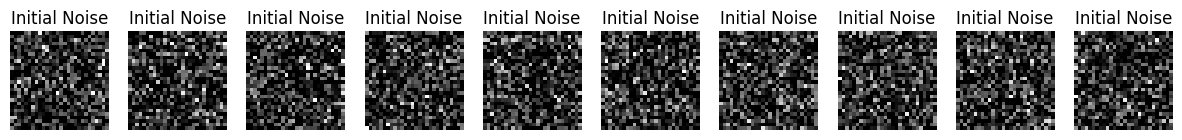

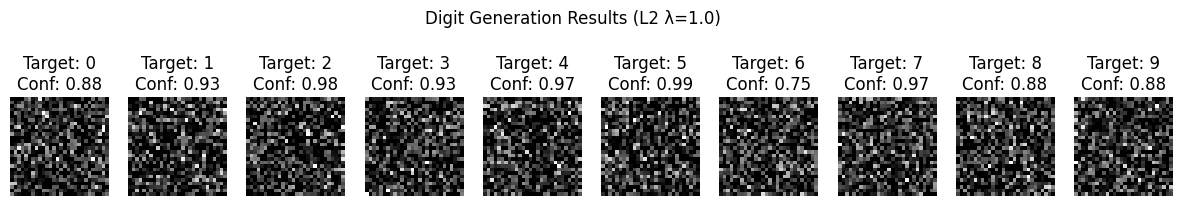

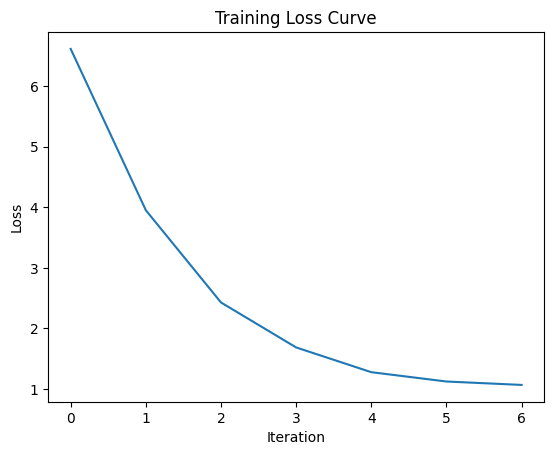


Generating with L2 λ=5.0
Iteration 0: Loss = 10.2794, Avg Confidence = 0.0908
Iteration 50: Loss = 7.5524, Avg Confidence = 0.3180
Iteration 100: Loss = 5.9068, Avg Confidence = 0.5402
Iteration 150: Loss = 5.1174, Avg Confidence = 0.7533
Iteration 200: Loss = 4.9054, Avg Confidence = 0.8584
Iteration 250: Loss = 4.7953, Avg Confidence = 0.9012
Iteration 299: Loss = 4.7131, Avg Confidence = 0.9237


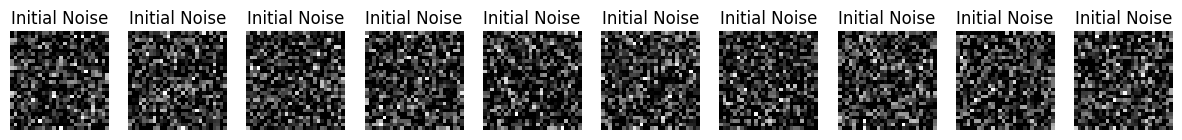

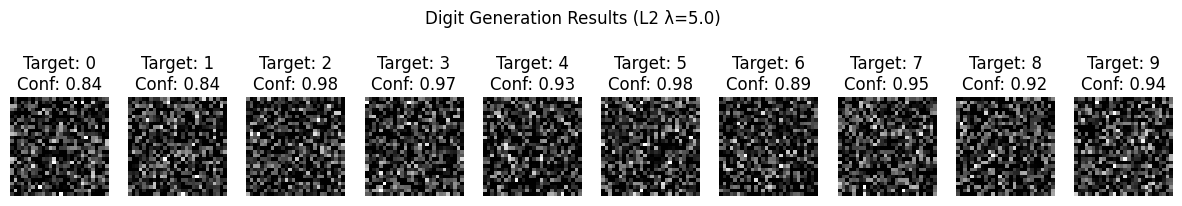

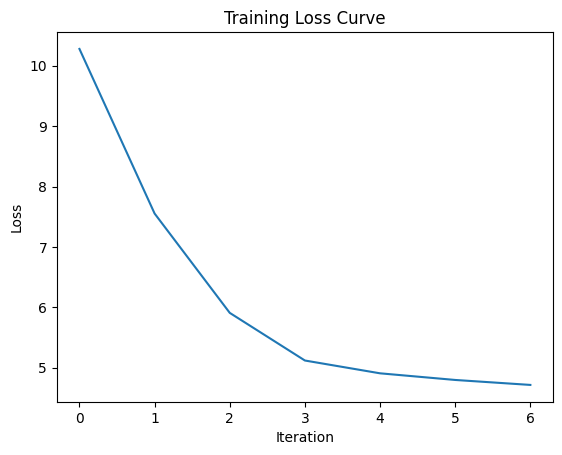


Generating with L2 λ=10.0
Iteration 0: Loss = 14.5844, Avg Confidence = 0.2332
Iteration 50: Loss = 11.5432, Avg Confidence = 0.4194
Iteration 100: Loss = 10.2281, Avg Confidence = 0.6736
Iteration 150: Loss = 9.6497, Avg Confidence = 0.7948
Iteration 200: Loss = 9.1991, Avg Confidence = 0.8620
Iteration 250: Loss = 8.8879, Avg Confidence = 0.9144
Iteration 299: Loss = 8.6476, Avg Confidence = 0.9365


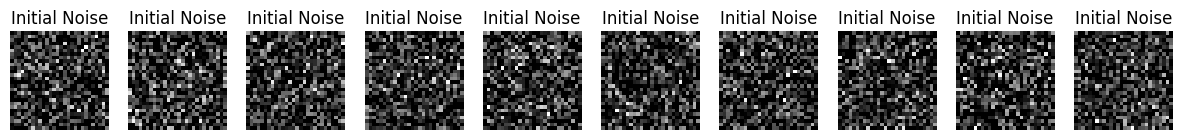

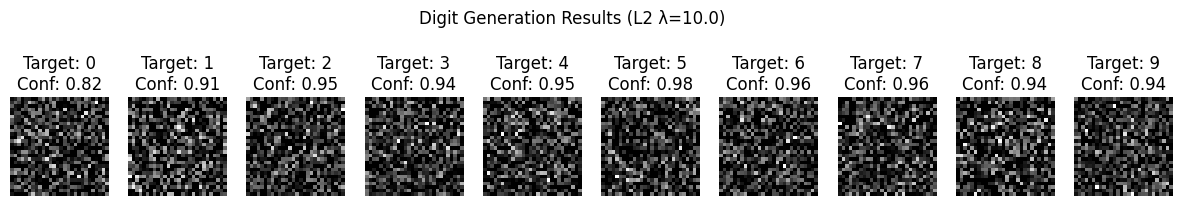

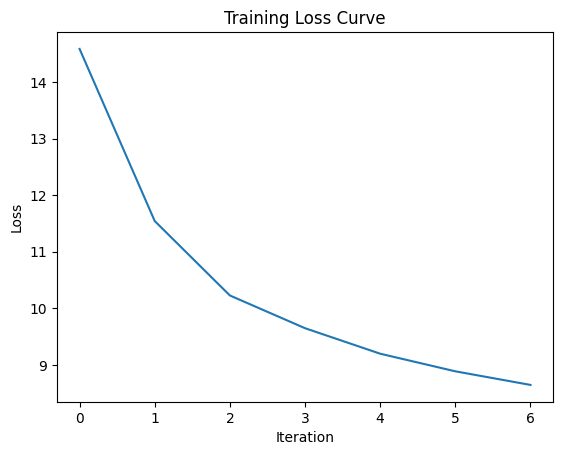

In [13]:
def generate_digits(model, lambda_l2=0.0, num_iterations=500):
    num_digits = 10
    # Initialize random noise images
    images = torch.randn((num_digits, 1, 28, 28), device=device, requires_grad=True)
    targets = torch.arange(num_digits, device=device)

    # Inverse transform for visualization (undo MNIST normalization)
    inverse_normalize = transforms.Normalize(
        mean=[-0.1307/0.3081],
        std=[1/0.3081]
    )

    learning_rate = 0.1
    history = {'images': [], 'confidences': [], 'loss': []}

    # Store initial images (before any optimization)
    with torch.no_grad():
      initial_images = images.detach().clone().cpu()

    plt.figure(figsize=(15, 5))
    for i in range(num_digits):
        plt.subplot(2, num_digits, num_digits+i+1)
        init_img = inverse_normalize(initial_images[i]).clamp(0, 1).numpy()[0]
        plt.imshow(init_img, cmap='gray')
        plt.title("Initial Noise")
        plt.axis('off')


    for iteration in range(num_iterations):
        if images.grad is not None:
            images.grad.zero_()

        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        confidences = probs[torch.arange(num_digits), targets]

        loss = nn.functional.cross_entropy(outputs, targets)
        loss += lambda_l2 * images.pow(2).mean()

        loss.backward()

        # update initial images based on gradient
        with torch.no_grad():
            images -= learning_rate * images.grad
            images.grad = None

        if iteration % 50 == 0 or iteration == num_iterations - 1:
            # Store denormalized images for visualization
            with torch.no_grad():
                denorm_images = inverse_normalize(images).clamp(0, 1).cpu().numpy()
                history['images'].append(denorm_images)
                history['confidences'].append(confidences.detach().cpu().numpy())
                history['loss'].append(loss.item())

            print(f"Iteration {iteration}: Loss = {loss.item():.4f}, Avg Confidence = {confidences.mean().item():.4f}")

    # Visualization
    plt.figure(figsize=(15, 5))
    for i in range(num_digits):
        plt.subplot(2, num_digits, i+1)
        plt.imshow(history['images'][-1][i][0], cmap='gray')
        plt.title(f"Target: {i}\nConf: {history['confidences'][-1][i]:.2f}")
        plt.axis('off')

    plt.suptitle(f"Digit Generation Results (L2 λ={lambda_l2})")
    plt.show()

    # Plot loss curve
    plt.figure()
    plt.plot(history['loss'])
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Training Loss Curve")
    plt.show()

    return images.detach()

def generate_hybrid(model, targets, weights=None, lambda_l2=0.0, num_iterations=500):
    if weights is None:
        weights = [1.0/len(targets)] * len(targets)

    image = torch.randn((1, 1, 28, 28), device=device, requires_grad=True)
    targets = torch.tensor(targets, device=device)

    # Inverse transform for visualization
    inverse_normalize = transforms.Normalize(
        mean=[-0.1307/0.3081],
        std=[1/0.3081]
    )

    learning_rate = 0.1
    history = {'images': [], 'probs': [], 'loss': []}

    for iteration in range(num_iterations):
        if image.grad is not None:
            image.grad.zero_()

        output = model(image)
        probs = torch.softmax(output, dim=1)

        # calculate loss for both images at the same time
        loss = torch.tensor(0.0, device=device)
        for t, w in zip(targets, weights):
            loss += -w * torch.log(probs[0, t])
        loss += lambda_l2 * image.pow(2).mean()

        loss.backward()

        with torch.no_grad():
            image -= learning_rate * image.grad
            image.grad = None

        if iteration % 50 == 0 or iteration == num_iterations - 1:
            # Store denormalized image
            with torch.no_grad():
                denorm_img = inverse_normalize(image).clamp(0, 1).cpu().numpy()
                history['images'].append(denorm_img)
                history['probs'].append(probs.detach().cpu().numpy())
                history['loss'].append(loss.item())

            print(f"Iteration {iteration}: Loss = {loss.item():.4f}")
            print("Probabilities:", {t: probs[0, t].item() for t in targets})

    # Visualization
    plt.figure(figsize=(10, 4))

    # Show final image (properly denormalized)
    final_img = history['images'][-1][0][0]
    plt.subplot(1, 2, 1)
    plt.imshow(final_img, cmap='gray')
    plt.title(f"Hybrid of {targets.cpu().numpy()}")
    plt.axis('off')

    # Show probabilities
    plt.subplot(1, 2, 2)
    plt.bar(range(10), history['probs'][-1][0])
    plt.xticks(range(10))
    plt.ylim(0, 1)
    plt.title("Class Probabilities")

    plt.suptitle(f"Hybrid Digit Generation (L2 λ={lambda_l2})")
    plt.show()

    return image.detach()


print("\n=== Task 1: Generating digits 0-9 from noise ===")
generated_digits = generate_digits(model, lambda_l2=0.0)

print("\n=== Task 2: Generating hybrid digits ===")
hybrid_3_8 = generate_hybrid(model, [3, 8], lambda_l2=0.0)
hybrid_0_6 = generate_hybrid(model, [0, 6], lambda_l2=0.0)

print("\n=== Task 3: Testing L2 regularization ===")
l2_values = [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0]
for l2 in l2_values:
    print(f"\nGenerating with L2 λ={l2}")
    _ = generate_digits(model, lambda_l2=l2, num_iterations=300)

# Questions
**Do the generated images resemble real MNIST digits? Why or why not?**

No, they not resemble real MNIST digits, the network sees patterns differently then humans and focuses on different weird (for humans) pixels.



 **Discuss, how you would approach a second task of
   generating an image that   
   bares similarity to two or more digits simultaneously.**

  Idea: We wanted image that has ~50% chance for digit x and ~50% chance for digit y.
  My approach was to calculate loss for both target images, so loss for both images will matter and will change the inputs.
  It was implemented here:

        loss = torch.tensor(0.0, device=device)
        for t, w in zip(targets, weights):
            loss += -w * torch.log(probs[0, t])
        loss += lambda_l2 * image.pow(2).mean()

I did it for pairs [3,8] and [0,6]


**Third task: repeat the previous tasks with an additional L2 penalty on noise within the images. Experiment with adding `lambda_l2 * dreamed_input_batch.pow(2).mean()` loss term, with `lambda_l2` being the penalty cooefficient within an exponential progression, say from 0.001 to 10.0. Are the new digits recognized correctly? How does the penalty impact the digit quality? Explain.**

I did the previous task with L2 penalty here:

        l2_values = [0.001, 0.01, 0.1, 1.0, 10.0]
        for l2 in l2_values:
            print(f"\nGenerating with L2 λ={l2}")
            _ = generate_digits(model, lambda_l2=l2, num_iterations=300)

L2 Penalty acts like a "noise tax", it punishes extreme pixel values and makes smoother images.
So we have a trade-off: More smoothing = nicer looking but less confident.

Additionally, we see the loss curve changes with different lambas, but the best "loss drop" is for the smallest lambdas.

PS. I don't know why the initial images look almost exactly the same, when I checked if they are different by doing:

        (images[0].detach().cpu() - initial_images[0]).abs().sum())

they are, but still I almost can't see that:(
